# Technique: 02 Z-Score Normalization

### What is this?
Z-Score Normalization changes your data numbers. After this, the **average (mean)** of the data will be **0**. The **spread (standard deviation)** will be **1**.

### Why use it?
1. It is very useful when we do not know the smallest or biggest numbers in the data.
2. It handles **outliers** (extreme numbers) better than Min-Max Normalization.
3. It helps the computer compare different types of data more easily.

### Math Formula:
$$z = \frac{x - \mu}{\sigma}$$
* $\mu$ is the average (mean).
* $\sigma$ is the spread (standard deviation).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_dtt_dataset, GLOBAL_SEED

# Initialize Dataset
df = generate_dtt_dataset()
print(f'Dataset loaded with Global Seed: {GLOBAL_SEED}')
df.head()

Dataset loaded with Global Seed: 888


,Age,Annual_Salary,Household_Size,Education_Level,Region,Cluster_Feature_1,Cluster_Feature_2,Transaction_Amount
0,47,293814.560245,2.219505,Master,North,-0.666995,8.207288,3.257499
1,63,293814.560245,1.967882,High School,East,-1.843954,-8.553721,68.050678
2,55,293814.560245,1.828750,PhD,East,6.498745,-7.157678,8.111841
3,36,293814.560245,1.772328,Bachelor,East,-1.257460,-8.568788,27.766274
4,42,293814.560245,3.174114,Master,North,8.144192,-6.575686,13.867245



Original Mean: 51617.89126289524
Original Std Deviation: 23904.40400464159


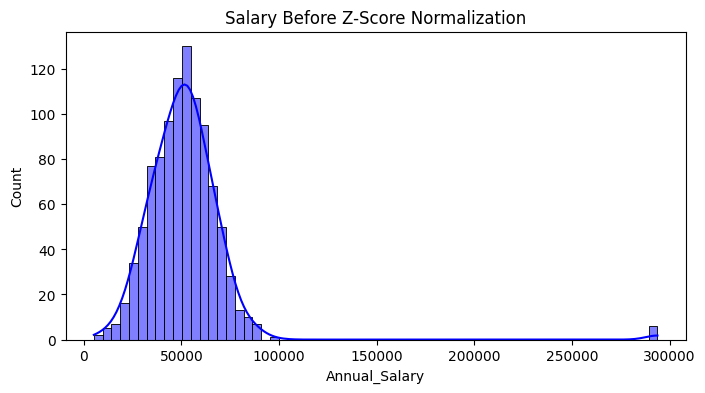

In [3]:
print("\nOriginal Mean:", df['Annual_Salary'].mean())
print("Original Std Deviation:", df['Annual_Salary'].std())

plt.figure(figsize=(8, 4))
sns.histplot(df['Annual_Salary'], kde=True, color='blue')
plt.title("Salary Before Z-Score Normalization")
plt.show()

## How to do it with Scikit-Learn
We use a tool called `StandardScaler`. This tool makes the data look like a "Normal Distribution" (a bell shape).

Implementation

New Salary (Z-Score values):
0    10.136955
1    10.136955
2    10.136955
3    10.136955
4    10.136955
Name: Salary_ZScore, dtype: float64

New Mean: 0.00
New Std Deviation: 1.00


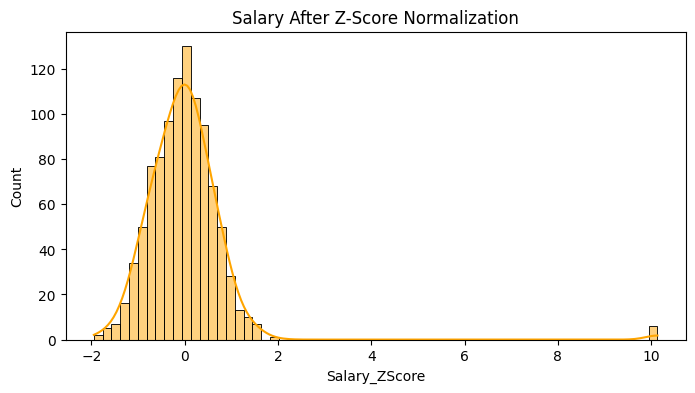

In [4]:
from sklearn.preprocessing import StandardScaler

# 1. Create the Scaler tool
scaler = StandardScaler()

# 2. Change the Salary column
# We use [[ ]] to make it a 2D shape for the tool
salary_reshaped = df[['Annual_Salary']]
df['Salary_ZScore'] = scaler.fit_transform(salary_reshaped)

# 3. Check the new results
print("New Salary (Z-Score values):")
print(df['Salary_ZScore'].head())

# 4. Check the New Mean and Std (Mean should be close to 0, Std should be 1)
print(f"\nNew Mean: {df['Salary_ZScore'].mean():.2f}")
print(f"New Std Deviation: {df['Salary_ZScore'].std():.2f}")

# 5. Draw a picture of the new data
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary_ZScore'], kde=True, color='orange')
plt.title("Salary After Z-Score Normalization")
plt.show()

### Important Difference:
* **Min-Max**: Numbers are always between **0 and 1**.
* **Z-Score**: Numbers can be **negative** (if below average) or **positive** (if above average).